---
# check train/test similarity between different imputation

In [1]:
import os
import pickle
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from gene_id_to_name import load_dict, save_dict
from common_io import load_dataFrame
from visualization import tsne_df

In [2]:
root_path = '/data/jianhao/clus_GRN'
num_cells = 500
raw_data_path = os.path.join(root_path, 'raw_expression_data/',
                             'pandas_dataframe_{}'.format(num_cells))
rwr_path = os.path.join(root_path, 'ensembl94',
                                'smoothed_dataframe_{}_cells'.format(num_cells) + 
                                '_per_cluster_all_gene_coexpression')
magic_path = os.path.join(root_path, 
                          'magic_smoothed_all_genes_{}_cells_per_cluster'.format(
                          num_cells))

p2feat_file = os.path.join(root_path, 'diff_gene_list', 
                           'top_50_MAD_val_selected_TF_pickle')

# p2feat_file = os.path.join(root_path, 'diff_gene_list', 
#                            'df_feature_column')
# p2feat_file = os.path.join(root_path, 'diff_gene_list', 
#                            'df_feature_column_lm')
with open(p2feat_file, 'rb') as f:
    selected_gene_list = pickle.load(f)

rwr_X, rwr_Y, rwr_feat = load_dataFrame(rwr_path, selected_gene_list)
selected_gene_list = rwr_feat

raw_X, raw_Y, raw_feat = load_dataFrame(raw_data_path, selected_gene_list)
magic_X, magic_Y, magic_feat = load_dataFrame(magic_path, selected_gene_list)

Done loading, shape of X =  (1500, 50)
Done loading, shape of X =  (1500, 50)
Done loading, shape of X =  (1500, 50)


In [3]:
print(np.count_nonzero(raw_X) / raw_X.size)
print(np.count_nonzero(rwr_X > 1e-2) / rwr_X.size)
print(np.count_nonzero(magic_X > 1e-2) / magic_X.size)

0.18248
0.98212
0.9587466666666666


In [26]:
df_all_raw = pd.read_pickle(raw_data_path)
df_all_rwr = pd.read_pickle(rwr_path)
df_all_magic = pd.read_pickle(magic_path)
print(df_all_rwr.shape)

(1500, 17490)


In [37]:
df_all_rwr[target_ids[0]].loc[test_row_idx][:10]

1442     7.635009
1462    12.412414
1431     4.767970
94      11.570292
934     13.791649
1375     9.572660
280     17.205393
565      4.250053
1391     8.616074
468     11.525422
Name: ENSG00000231500, dtype: float32

---
# clustering on raw, magic, rwr data

In [4]:
from sc_different_clustering import kmeans_clustering
from common_io import split_df_and_assignment

In [5]:
def get_df(X, Y, feat_col):
    df = pd.DataFrame(X, columns=feat_col)
    df['label'] = Y
    return df

In [6]:
raw_df = get_df(raw_X, raw_Y, raw_feat)
rwr_df = get_df(rwr_X, rwr_Y, rwr_feat)
magic_df = get_df(magic_X, magic_Y, magic_feat)

raw_train_df, raw_test_df, raw_train_label, raw_test_label = split_df_and_assignment(
    raw_df, raw_Y)

rwr_train_df, rwr_test_df, rwr_train_label, rwr_test_label = split_df_and_assignment(
    rwr_df, rwr_Y)

magic_train_df, magic_test_df, magic_train_label, magic_test_label = split_df_and_assignment(
    magic_df, magic_Y)

In [7]:
print(raw_train_df.shape)
print(raw_test_df.shape)

(1200, 51)
(300, 51)


In [8]:
row_idx = raw_train_df.index.values
print(row_idx)
raw_train_df[:10]

[ 531 1287 1461 ...  304  105  759]


,ENSG00000117318,ENSG00000065978,ENSG00000177606,ENSG00000054267,ENSG00000115738,ENSG00000162924,ENSG00000196843,ENSG00000135899,ENSG00000067066,ENSG00000124831,...,ENSG00000073584,ENSG00000173917,ENSG00000130816,ENSG00000171223,ENSG00000104903,ENSG00000127528,ENSG00000126456,ENSG00000171425,ENSG00000100219,label
531,0.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,cd56_natural_killer_cells
1287,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,regulatory_t_cells
1461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,1.0,regulatory_t_cells
545,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,cd56_natural_killer_cells
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,cd19_b_cells
331,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,cd19_b_cells
75,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,cd19_b_cells
842,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,cd56_natural_killer_cells
43,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,cd19_b_cells
1361,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,regulatory_t_cells


In [9]:
raw_df.loc[row_idx][:10]

,ENSG00000117318,ENSG00000065978,ENSG00000177606,ENSG00000054267,ENSG00000115738,ENSG00000162924,ENSG00000196843,ENSG00000135899,ENSG00000067066,ENSG00000124831,...,ENSG00000073584,ENSG00000173917,ENSG00000130816,ENSG00000171223,ENSG00000104903,ENSG00000127528,ENSG00000126456,ENSG00000171425,ENSG00000100219,label
531,0.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,cd56_natural_killer_cells
1287,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,regulatory_t_cells
1461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,5.0,0.0,2.0,0.0,0.0,1.0,regulatory_t_cells
545,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,cd56_natural_killer_cells
452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,cd19_b_cells
331,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,cd19_b_cells
75,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,cd19_b_cells
842,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,cd56_natural_killer_cells
43,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,cd19_b_cells
1361,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,regulatory_t_cells


---
# visualization of train and test

In [98]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_df(df, feat_cols):
    tsne = TSNE(n_components = 2, verbose = 1, perplexity=40, n_iter = 1000,
               random_state=42)
    tsne_result = tsne.fit_transform(df[feat_cols].values)
    df_tsne = pd.DataFrame()
    df_tsne['x-tsne'] = tsne_result[:, 0]
    df_tsne['y-tsne'] = tsne_result[:, 1]
    df_tsne['label'] = df['label']

    return df_tsne
    
def plot_tsne(df_tsne, label_list, fig_title):
    sc_x = df_tsne['x-tsne'].values
    sc_y = df_tsne['y-tsne'].values
    fig = plt.figure()
    ax = fig.add_subplot(111)
    color_list = ['r', 'y','b']
    type_name_num_map = {
        'cd19_b_cells': 0,
        'regulatory_t_cells': 1,
        'cd56_natural_killer_cells': 2
    }
    tmp = 0
    for idx, label in enumerate(label_list):
        if label not in type_name_num_map:
            type_name_num_map[label] = tmp
            color_idx = tmp
            tmp += 1
        else:
            color_idx = type_name_num_map[label]

            
        ax.scatter(sc_x[idx],
            sc_y[idx],
    #         label = 'type {}'.format(label),
            color=color_list[color_idx],
            alpha= 0.8,
            s = 20)
#     ax.legend()
    ax.set_title(fig_title)
    ax.set_xlabel('tsne 1')
    ax.set_ylabel('tsne 2')
    ax.grid(color = 'grey', alpha = 0.4)
    plt.show()
    
def plot_target_value(df_tsne, target_list, fig_title):
    sc_x = df_tsne['x-tsne'].values
    sc_y = df_tsne['y-tsne'].values
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sc = ax.scatter(sc_x, sc_y,
              c = target_list,
              s = 20,
              alpha = 0.8)
    ax.set_title(fig_title)
    ax.set_xlabel('tsne 1')
    ax.set_ylabel('tsne 2')
    ax.grid(color = 'grey', alpha = 0.4)
    plt.colorbar(sc)
    plt.show()
    

In [99]:
target_ids = ['ENSG00000231500', 'ENSG00000137154', 'ENSG00000177954', 'ENSG00000205542', 'ENSG00000142541', 'ENSG00000140988', 'ENSG00000251562', 'ENSG00000167526', 'ENSG00000166710', 'ENSG00000147403']


(1500, 51)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.003s...
[t-SNE] Computed neighbors for 1500 samples in 0.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.057926
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.432697
[t-SNE] KL divergence after 1000 iterations: 0.235874


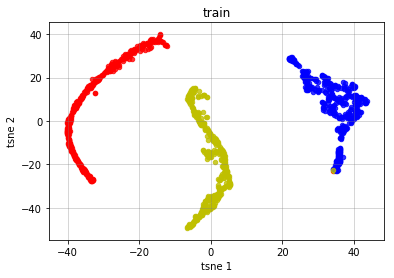

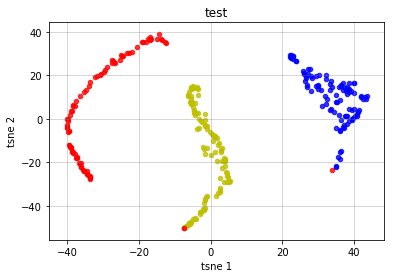

In [100]:
df_final = pd.DataFrame(magic_X, columns = selected_gene_list)
df_final['label'] = magic_Y
print(df_final.shape)
df_tsne = tsne_df(df_final, selected_gene_list)

train_row_idx = magic_train_df.index.values
test_row_idx = magic_test_df.index.values

plot_tsne(df_tsne.loc[train_row_idx], magic_train_label, 'train')
plot_tsne(df_tsne.loc[test_row_idx], magic_test_label, 'test')

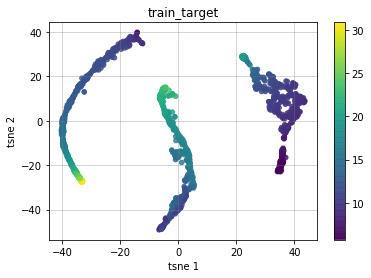

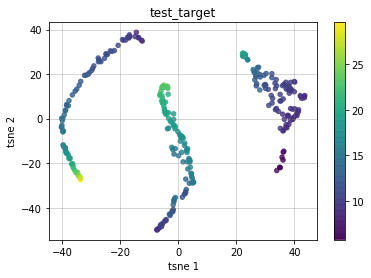

In [102]:
for tmp_idx in [1]:
    train_target_list = df_all_magic[target_ids[tmp_idx]].loc[train_row_idx].values
    test_target_list = df_all_magic[target_ids[tmp_idx]].loc[test_row_idx].values

    plot_target_value(df_tsne.loc[train_row_idx], train_target_list, 'train_target')
    plot_target_value(df_tsne.loc[test_row_idx], test_target_list, 'test_target')

(1500, 51)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.003s...
[t-SNE] Computed neighbors for 1500 samples in 0.212s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 0.719724
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.909744
[t-SNE] KL divergence after 1000 iterations: 1.577719


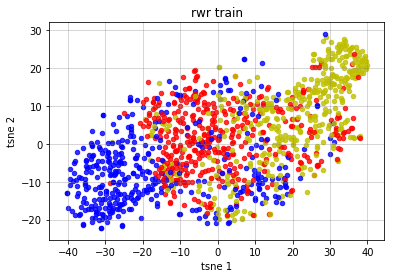

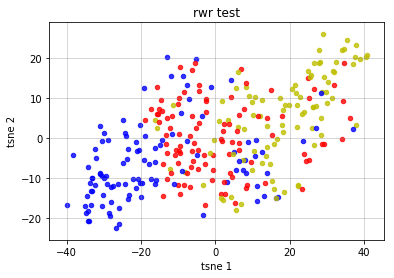

In [104]:
df_final = pd.DataFrame(rwr_X, columns = selected_gene_list)
df_final['label'] = rwr_Y
print(df_final.shape)
df_tsne = tsne_df(df_final, selected_gene_list)

train_row_idx = rwr_train_df.index.values
test_row_idx = rwr_test_df.index.values
plot_tsne(df_tsne.loc[train_row_idx], rwr_train_label, 'rwr train')
plot_tsne(df_tsne.loc[test_row_idx], rwr_test_label, 'rwr test')

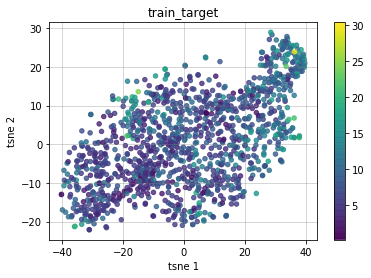

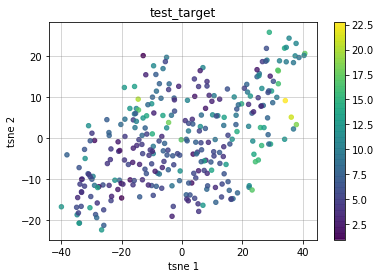

In [106]:
for tmp_idx in [1]:
    train_target_list = df_all_rwr[target_ids[tmp_idx]].loc[train_row_idx].values
    test_target_list = df_all_rwr[target_ids[tmp_idx]].loc[test_row_idx].values

    plot_target_value(df_tsne.loc[train_row_idx], train_target_list, 'train_target')
    plot_target_value(df_tsne.loc[test_row_idx], test_target_list, 'test_target')

(1500, 51)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.003s...
[t-SNE] Computed neighbors for 1500 samples in 0.206s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 1.410895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.195786
[t-SNE] KL divergence after 1000 iterations: 1.547426


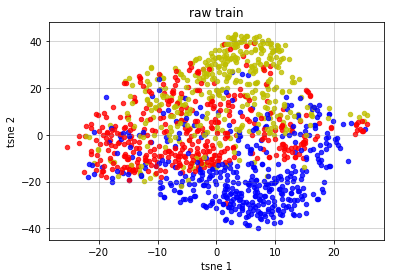

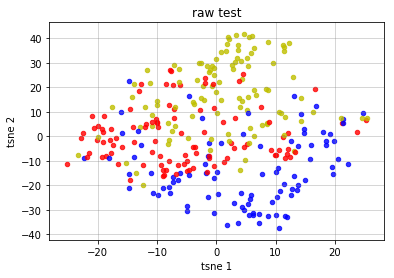

In [107]:
df_final = pd.DataFrame(raw_X, columns = selected_gene_list)
df_final['label'] = raw_Y
print(df_final.shape)
df_tsne = tsne_df(df_final, selected_gene_list)

train_row_idx = raw_train_df.index.values
test_row_idx = raw_test_df.index.values
plot_tsne(df_tsne.loc[train_row_idx], raw_train_label, 'raw train')
plot_tsne(df_tsne.loc[test_row_idx], raw_test_label, 'raw test')

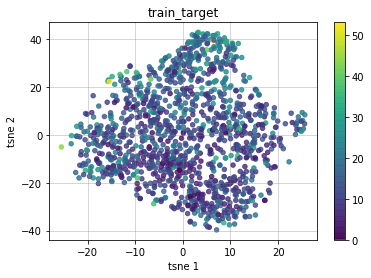

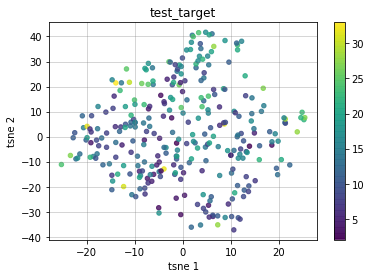

In [108]:
for tmp_idx in [1]:
    train_target_list = df_all_raw[target_ids[tmp_idx]].loc[train_row_idx].values
    test_target_list = df_all_raw[target_ids[tmp_idx]].loc[test_row_idx].values

    plot_target_value(df_tsne.loc[train_row_idx], train_target_list, 'train_target')
    plot_target_value(df_tsne.loc[test_row_idx], test_target_list, 'test_target')